In [39]:
from google.colab import drive
drive.mount('/content/drive')

# Package installations
!pip install -U scikit-learn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
ls "/content/drive/My Drive"

'aws ml training.gdoc'                    nlp/
'Bank Customer Churn Prediction.csv'      Notes.gdoc
'Bank Customer Churn Prediction.gsheet'   observations.csv
'Colab Notebooks'/                        observations.csv.gsheet
'data analytics notes'/                  'parsing notes.gdoc'
'Feature Engineering.gdoc'                projects/
 FullSizeRender.jpg                      'Project Task.gdoc'
'Getting started.pdf'                     spark/
'Imbalanced dataset.gdoc'                 species_info.csv
'interview prep.gdoc'                     species_info.csv.gsheet
'KTCLUB Promotion.gdoc'                   tableau/
 learn/                                  'Udemy FA Course - 2022'/
'machine learning notes'/


## Import Libraries

In [45]:
# Load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

## Load Data

In [4]:
df = pd.read_csv("/content/drive/My Drive/Bank Customer Churn Prediction.csv")

display(df.head)

<bound method NDFrame.head of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estima

## Explore Data

In [5]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [6]:
# Check churn ratio
print(df.churn.value_counts())

0    7963
1    2037
Name: churn, dtype: int64


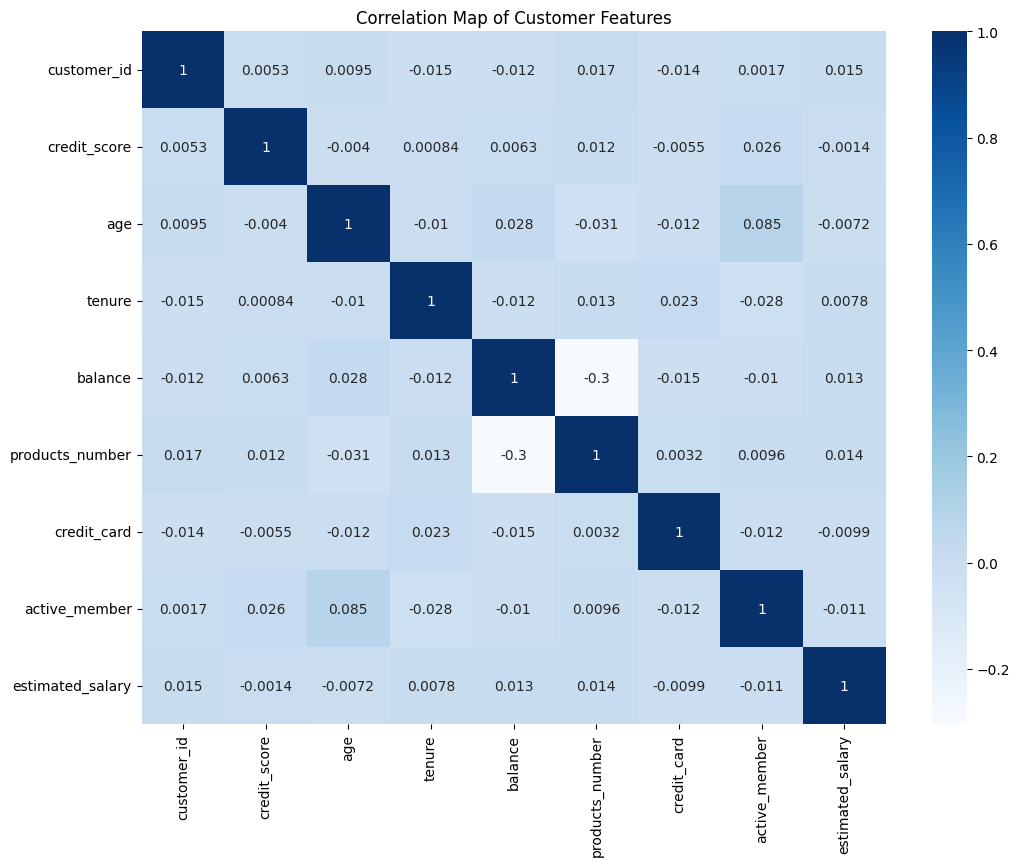

In [48]:
# Correlation map
def plot_corr_map(df):

  # Drop label column
  corr_df = df.drop(columns=['churn'])

  # Apply correlation method
  corr = corr_df.corr()

  # Plot correlation map
  plt.figure(figsize=(12, 9))
  sns.heatmap(corr, annot=True, cmap='Blues')
  plt.title("Correlation Map of Customer Features")

plot_corr_map(df)

## Data Prep

In [23]:
# Feature variables
X = pd.get_dummies(df.iloc[:,:-1])
display(X.head())

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [24]:
# Target variable
y = df.iloc[:,-1]
display(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

## Modeling

In [25]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [30]:
# XGBoost implementation
xgb = XGBClassifier()

# Fit onto training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
# Make predictions
y_pred = xgb.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [35]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1585
           1       0.73      0.50      0.60       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## Hyperparameter Tuning

In [46]:
# GridSearchCV implementation

# Define grid of hyperparameters to search over
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.5, 0.75, 1],
}

# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy scores
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Accuracy score:  0.8654999999999999


Since scores were the same post tuning, we will keep our original parameter settings. 



## Evaluation

In [47]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1585
           1       0.73      0.50      0.60       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



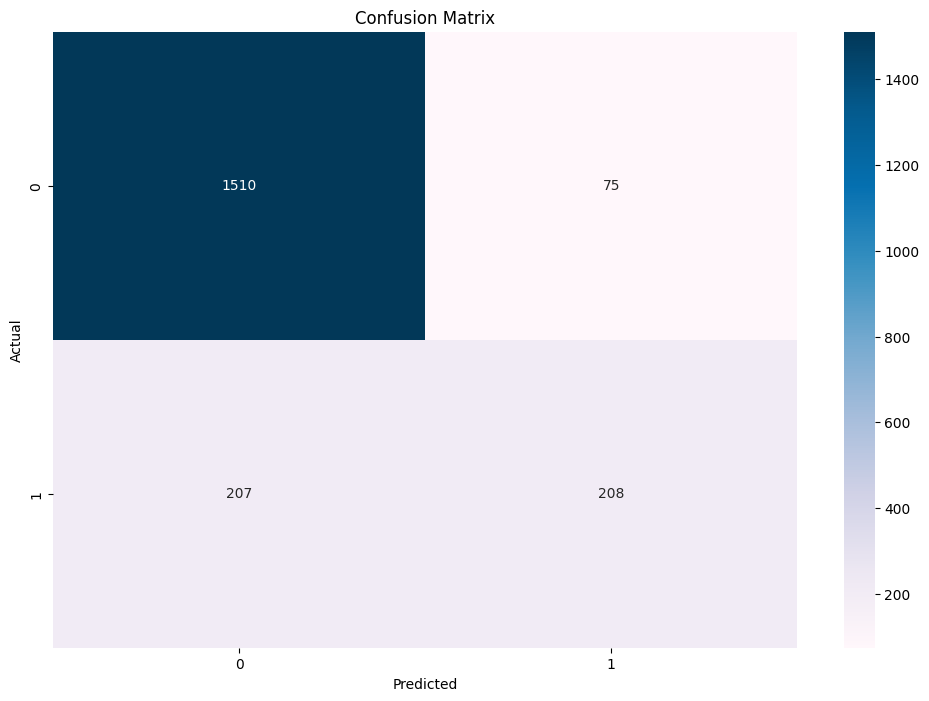

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='PuBu')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();